In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.19.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls gdrive/MyDrive

 AI_SaaS_MVP_Roadmap_Notion.md			   Files
 all_ans.gdoc					   FINAL450.xlsx
' ANN-Hyper Parameter Optimization.ipynb'	  'Final & second Project.gdoc'
 BackPack_Ans.gdoc				   mohsin.pdf
 certificate.pdf				  'phitron backup'
 Churn_Modelling.csv				   Photo
'Colab Notebooks'				  'professinal email.gdoc'
'Copy of c_programming.pdf'			  'project update.gdoc'
'Copy of Zapier: Gmail signature templates.gdoc'   xray_dataset.zip
 Cv_mohsin.pdf


In [5]:
!unzip gdrive/MyDrive/xray_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1192-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1258-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1183-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1258-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1228-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1202-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1176-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1261-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1234-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1188-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1198-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1254-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1242-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1189-0001.jpeg  
  inflating: chest_xray/train

In [6]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
# Setting the training data directory
Datadir = r"chest_xray/train/"

In [8]:
# intiallizing the category of classification
CATEGORIES = ["NORMAL", "PNEUMONIA"]

In [9]:
! ls chest_xray/test

NORMAL	PNEUMONIA


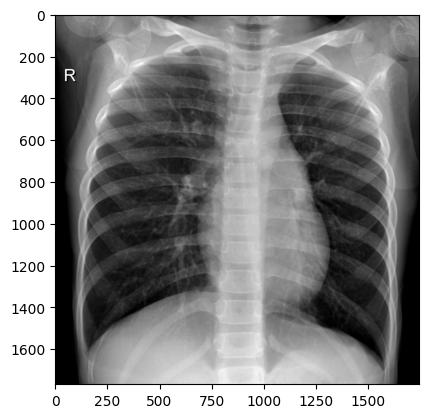

In [10]:
# Convert the images into grayscale
for i in CATEGORIES:
    path = os.path.join(Datadir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [11]:
img_size = 100

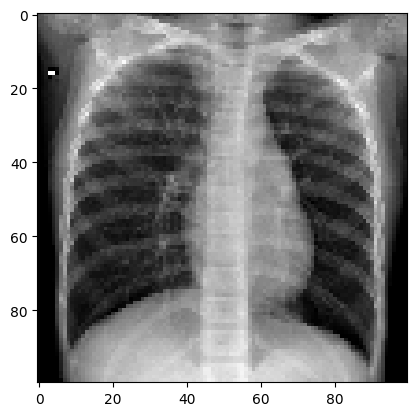

In [12]:
# image after resize and gray scale
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
training_data = []

In [14]:
def create_training_data():
    for i in CATEGORIES:
        path = os.path.join(Datadir, i)
        class_num = CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])

            except Exception as e:
                pass

In [15]:
create_training_data()

In [16]:
import random
random.shuffle(training_data)
for sample in training_data[:2]:
    print(sample)

[array([[22, 28, 28, ...,  0,  0,  0],
       [23, 29, 31, ...,  0,  0,  0],
       [23, 28, 31, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[ 29,  34,  77, ...,  41,  37,  31],
       [ 17,  59, 122, ...,  42,  38,  33],
       [ 65, 107,  43, ...,  47,  37,  33],
       ...,
       [ 42,  36,  36, ...,  34,  34,  36],
       [ 40,  36,  35, ...,  34,  34,  35],
       [ 40,  38,  35, ...,  36,  35,  35]], dtype=uint8), 1]


In [29]:
# Spliting the feature and labels

x =[]
y =[]

for feature, label in training_data:
    x.append(feature)
    y.append(label)

x = np.array(x)
y = np.array(y)

In [37]:
y[:5]

array([1, 1, 0, 1, 1])

In [32]:
# reshape the feature for make compatible with tensorflow

x = x.reshape(-1, img_size, img_size, 1)

In [20]:
!ls chest_xray/val/NORMAL/ | wc -l

8


In [21]:
# For Validation data
validation_data = []
Datadir_val = r'chest_xray/val'

def create_validation_data():
    for i in CATEGORIES:
        path = os.path.join(Datadir_val, i)
        class_num = CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array_val = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array_val = cv2.resize(img_array_val, (img_size, img_size))
                validation_data.append([new_array_val, class_num])

            except Exception as e:
                pass

create_validation_data()


In [22]:
len(validation_data)

16

In [23]:
random.shuffle(validation_data)

In [30]:
x_val = []
y_val = []

for feature, label in validation_data:
    x_val.append(feature)
    y_val.append(label)

x_val = np.array(x_val) # Convert to numpy array
y_val = np.array(y_val)

### CNN

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu',input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [38]:
# Fit model with 10 epoch

model.fit(x, y, batch_size=4, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9661 - loss: 0.0858 - val_accuracy: 0.8125 - val_loss: 0.7142
Epoch 2/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9682 - loss: 0.0857 - val_accuracy: 0.7500 - val_loss: 0.5060
Epoch 3/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9746 - loss: 0.0739 - val_accuracy: 0.8125 - val_loss: 0.4465
Epoch 4/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9724 - loss: 0.0748 - val_accuracy: 0.9375 - val_loss: 0.1595
Epoch 5/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9740 - loss: 0.0857 - val_accuracy: 0.8125 - val_loss: 0.4058
Epoch 6/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9676 - loss: 0.0891 - val_accuracy: 0.7500 - val_loss: 1.2558
Epoch 7/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9731 - loss: 0.0784 - val_accuracy: 0.9375 - val_loss: 0.1488
Epoch 8/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9774 - loss: 0.0663 -

In [40]:
model.save(r"model_xray.h5")

In [41]:
# importing the library for testing the model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [70]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

def image_prepare(image):
    img_size = 100
    img_t = tf.keras.preprocessing.image.load_img(image, color_mode='grayscale',
                                                target_size=(img_size, img_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img_t)
    return img_array.reshape(-1, img_size, img_size, 1)

In [43]:
!ls

chest_xray  gdrive  model_xray.h5  sample_data


In [44]:
model = tf.keras.models.load_model("model_xray.h5")

In [71]:
image = r'chest_xray/test/NORMAL/IM-0059-0001.jpeg'

In [72]:
prediction = model.predict(image_prepare(image) / 255.0)
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.9900274]]
1
PNEUMONIA


In [57]:
image2 = r'chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'

In [65]:
prediction2 = model.predict([image_prepare(image2)/255.0])
print(prediction2)
print(round(prediction2[0][0]))
print(CATEGORIES[int(round(prediction2[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.99352795]]
1
PNEUMONIA


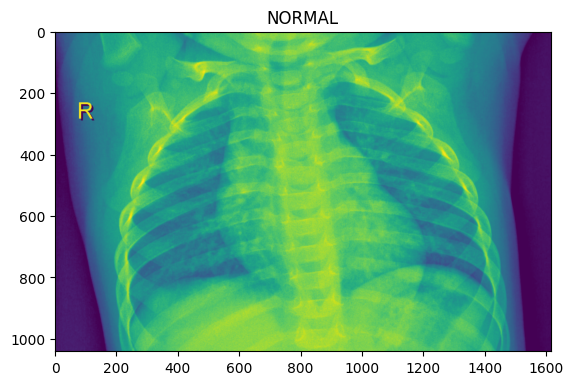

In [68]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()